In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
# model parameters

m_s = 50 #in kg (weight of rocket shell)
g = 9.81 #in m/s^2
rho = 1.091 #in kg/m^3 (average air density throughout flight, assumed constant)
r = 0.5 #in m
A = numpy.pi*(r**2) #maximum cross sectional area of the rocket
v_e = 325. #in m/s (exhaust speed)
C_D = 0.15 #Drag coefficient
#initial conditions

v0 = 0.0
h0 = 0.0
m_p0 = 100.0 #in kg at time t=0, initial weight of the rocket propellant

In [3]:
T = 40  #final time
dt = 0.1  #time increment
N = int(T/dt) + 1  #number of time-steps
t = numpy.linspace(0, T, N)

In [4]:
#m_pdot
m_pdot = numpy.zeros_like(t)

for i in range(N-1):
    time=i*dt
    if time < 5.:
        m_pdot[i] = 20.
    else:
        m_pdot[i] = 0.

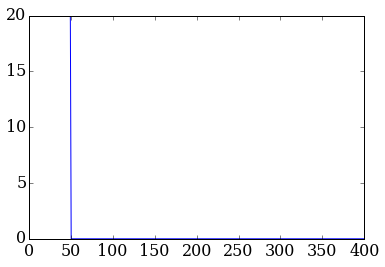

In [5]:
pyplot.plot(m_pdot)

In [6]:
#set up integral for m_p:
m_p = numpy.zeros_like(t)
m_p[0] = m_p0

for j in range(N-1):
    
    #if m_p[j] < 0.:
    #    m_p[j] =0.
        
    m_p[j+1] = m_p[j] - m_pdot[j]*dt 
              
print(m_p)


[ 100.   98.   96.   94.   92.   90.   88.   86.   84.   82.   80.   78.
   76.   74.   72.   70.   68.   66.   64.   62.   60.   58.   56.   54.
   52.   50.   48.   46.   44.   42.   40.   38.   36.   34.   32.   30.
   28.   26.   24.   22.   20.   18.   16.   14.   12.   10.    8.    6.
    4.    2.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   

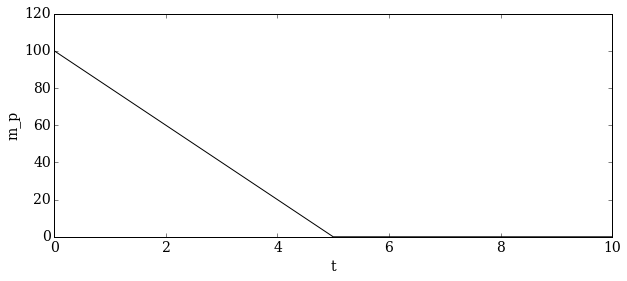

In [7]:
#plot m_p vs time

pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(0,120) #y-axis plot limits
pyplot.xlim(0,10)
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('m_p', fontsize=14) #y label
pyplot.plot(t,m_p, 'k-');

In [8]:
numpy.where(t==3.2)
m_p[32]

36.0

In [9]:
#initialize h and v arrays
h = numpy.zeros_like(t)
v = numpy.zeros_like(t)

h[0] = h0
v[0] = v0

for n in range(N-1):
    
    if h[n] < 0:
        break
        
    v[n+1] = (-g + (m_pdot[n]*v_e)/(m_s+m_p[n]) -\
              0.5*(rho*v[n]*abs(v[n])*A*C_D)/(m_s + m_p[n]))*dt + v[n]
    
    h[n+1] = h[n] + dt*v[n]

    

In [10]:
print('v:')
print(v)
print()
print('h:')
print(h)
print(t)

v:
[  0.00000000e+00   3.35233333e+00   6.76273724e+00   1.02317789e+01
   1.37599957e+01   1.73478916e+01   2.09959340e+01   2.47045500e+01
   2.84741220e+01   3.23049842e+01   3.61974176e+01   4.01516455e+01
   4.41678288e+01   4.82460602e+01   5.23863594e+01   5.65886668e+01
   6.08528377e+01   6.51786356e+01   6.95657262e+01   7.40136697e+01
   7.85219141e+01   8.30897874e+01   8.77164898e+01   9.24010858e+01
   9.71424956e+01   1.01939487e+02   1.06790665e+02   1.11694464e+02
   1.16649141e+02   1.21652760e+02   1.26703188e+02   1.31798084e+02
   1.36934886e+02   1.42110808e+02   1.47322824e+02   1.52567661e+02
   1.57841794e+02   1.63141428e+02   1.68462498e+02   1.73800658e+02
   1.79151272e+02   1.84509411e+02   1.89869842e+02   1.95227029e+02
   2.00575126e+02   2.05907975e+02   2.11219105e+02   2.16501732e+02
   2.21748762e+02   2.26952796e+02   2.32106133e+02   2.24200782e+02
   2.16759073e+02   2.09739137e+02   2.03104019e+02   1.96820980e+02
   1.90860905e+02   1.85197814e

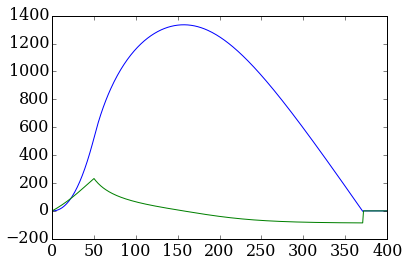

In [11]:
#Plot the altitude and velocity
pyplot.plot(h)
pyplot.plot(v)

In [12]:
#Detmine the maximum velocity and altitude

v_max = numpy.amax(v)
h_max = numpy.amax(h)

print('Max velocity:')
print(v_max)
print()
print('Max altitude:')
print(h_max)

Max velocity:
232.106133413

Max altitude:
1334.18294543


MAXIMUM VELOCITY

In [13]:
#Determine where in the array velocity is at its maximum
numpy.where(v==v_max)

(array([50]),)

In [14]:
#Find the corresponding values for time and altitude when velocity is at maximum
print(t[50])
print(h[50])

5.0
523.522834292


MAXIMUM HEIGHT

In [15]:
#Determine where in the array altitude is at its max
numpy.where(h==h_max)

(array([157]),)

In [16]:
#Find the corrresponding values for time when altitude is at its max
print(t[157])

15.7


IMPACT

In [17]:
#Determine where in the altitude array the Rocket hits the ground
print(numpy.where(h<=0)[0][2])

371


In [18]:
#Determine the time the rocket impacts the ground
print('The time the rocket impacts the ground is:')
print(t[371])
print()
#Determine the velocity of the rocket when it impacts the ground
print('The velocity of the rocket at the time of impact is:')
print(v[371])

The time the rocket impacts the ground is:
37.1

The velocity of the rocket at the time of impact is:
-86.0068349838
